<a href="https://colab.research.google.com/github/sundharaiexpert/into_to_tensorflow_for_ai/blob/main/withCallback_MNIST_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Computer Vision Example Loading Fashion Data MNIST


In [1]:
import tensorflow as tf

print(tf.__version__)

2.7.0


The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
This dataset is available directly in the tf.keras.datasets API and you load it like this:





In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

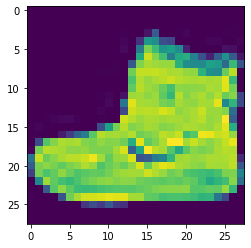

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 160 138  52   0   0   0   0   0   0  14 116 166 179   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 190 164 207 176 151 111  88 120 169 208 255 174 181  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 210 194 166 254 251  87   0 148 254 255 204 155 216   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  33 218 235 153 135 243 208 173 252 255 198  85 225 218  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  75 226 222 250 136  98 158 188 166 115  95 227 229 223  52   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 120 252 218 226 253 227 176 153 170 209 252 235 219 231  94   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 158 243 219 223 219 223 230 231 230 226 219 220 218 228 134   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 173 236 220 219 219 

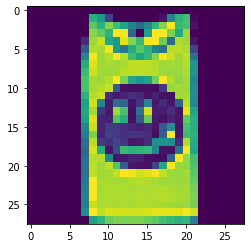

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 101

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [6]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [7]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4988 - accuracy: 0.8231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3778 - accuracy: 0.8624
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8910


In [9]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3545 - accuracy: 0.8736


[0.3544602394104004, 0.8736000061035156]

In [12]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [16]:
# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [18]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model with a callback
model.fit(x_train, y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4744 - accuracy: 0.8316
Epoch 2/50
1870/1875 [============================>.] - ETA: 0s - loss: 0.3575 - accuracy: 0.8697
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3574 - accuracy: 0.8697


In [20]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3825 - accuracy: 0.8643


[0.3825371563434601, 0.864300012588501]